# DATA612, Final Project
# Social Network Analysis of the NBA

YouTube link: https://www.youtube.com/watch?v=8vigjCuHem0

July, 2019

In [3]:
# import libraries
import csv
import math
import networkx as net
from networkx.algorithms import bipartite as bi
import matplotlib as plt
import pandas as pd
from matplotlib.pyplot import figure

# Goal of project: identify important NBA players' networks
Which players have had the most teammates? Which players have strong ties to LeBron James? Which NBA All-Stars have played together?

Today, NBA players change teams often. Players change teams for a variety of reasons, but the most discussed is to team up with other players. This project aims to depict the networks of NBA players' to visualize interesting networks, and speculate upon future player movement.

In [4]:
# open nba data as a CSV file
nba_data = csv.reader(open("NBA_network.csv"))
nba_data_df = pd.read_csv("NBA_network.csv", header = None)

# The Dataset:
the data includes player information from 1998-2019. But, this dataset only includes players that were active during the 2018-2019 NBA season. So, Vince Carter and Dwyane Wade are in this dataset because they played last season. But, Kobe Bryant and Shaq are not in the dataset because they did not play last season. 

In [5]:
# create network 
g = net.Graph()

# lists of all distinct teams and players
teams = []
players = []

# construct directed graph
for row in nba_data:
    if row[0] not in teams:
        teams.append(row[0])
    if row[1] not in players:
        players.append(row[1])
    g.add_edge(row[0], row[1], weight=1)

In [6]:
print "nodes in network:", len(g)

nodes in network: 958


In [7]:
connected_net = list(net.connected_component_subgraphs(g))
#print "size of largest component:", len(connected_net[0])

In [8]:
# players with the most seasons
print "Players with most seasons:"
print nba_data_df[1].value_counts().head(10)

Players with most seasons:
Vince Carter       20
Dirk Nowitzki      20
Jamal Crawford     19
Tony Parker        18
Pau Gasol          18
Tyson Chandler     18
Nene               17
LeBron James       16
Carmelo Anthony    16
Udonis Haslem      16
Name: 1, dtype: int64


In [9]:
# create an affiliation network of only teams
teamnet = bi.weighted_projected_graph(g, teams)

In [10]:
# create an affiliation network of only players
# this will become our main network..
playernet = bi.weighted_projected_graph(g, players, ratio = False)

In [11]:
# list of the players with most seasons as teammates:
connect_list = list(playernet.edges(data=True))
player_connections = sorted(connect_list, key=lambda tup: tup[2])
player_connections = player_connections[::-1]
print "Players with most seasons as teammates:"
player_connections[0:15]

Players with most seasons as teammates:


[('Dwyane Wade', 'Udonis Haslem', {'weight': 14}),
 ('Marc Gasol', 'Mike Conley', {'weight': 11}),
 ('Dirk Nowitzki', 'Devin Harris', {'weight': 10}),
 ('Nene', 'Carmelo Anthony', {'weight': 9}),
 ('Alec Burks', 'Derrick Favors', {'weight': 8}),
 ('Danny Green', 'Kawhi Leonard', {'weight': 8}),
 ('Taj Gibson', 'Jimmy Butler', {'weight': 8}),
 ('Kevin Durant', 'Russell Westbrook', {'weight': 8}),
 ('Stephen Curry', 'Klay Thompson', {'weight': 8}),
 ('DeAndre Jordan', 'Blake Griffin', {'weight': 8}),
 ('Tony Parker', 'Danny Green', {'weight': 8}),
 ('Joakim Noah', 'Derrick Rose', {'weight': 8}),
 ('Kawhi Leonard', 'Patty Mills', {'weight': 7}),
 ('Russell Westbrook', 'Serge Ibaka', {'weight': 7}),
 ('Danny Green', 'Patty Mills', {'weight': 7})]

## Measures of Player Centrality

In networks, centrality is critically important. Centality finds the nodes (players) most central to the network by overall connections (Degree Centrality), closeness to rest of network (Closeness Centrality), or bridges between groups of players (Betweenness Centrality).

In [12]:
# look at centrality among players
deg = net.degree(playernet)
deg_list = sorted(playernet.degree, key=lambda x: x[1], reverse=True)

In [13]:
# look at closeness centrality of players, and teams
import operator
closeness_cen = net.closeness_centrality(playernet)
closeness_list = sorted(closeness_cen.items(), key=operator.itemgetter(1))

In [14]:
# look at betweenness centrality of players
betweenness_cen = net.betweenness_centrality(playernet)
betweenness_list = sorted(betweenness_cen.items(), key=operator.itemgetter(1))

## Highest degree centrality:

In [15]:
cen_list = []

for i in playernet:
    cen_list.append([i, deg[i], betweenness_cen[i], closeness_cen[i]])
    
centrality_df = pd.DataFrame(cen_list, columns = ['Player', 'Degree', 'Betweenness', 'Closeness'])

centrality_df = centrality_df.sort_values(by=['Degree'], ascending=False)
centrality_df.head(5)

,Player,Degree,Betweenness,Closeness
257,Anthony Tolliver,78,0.016905,0.528529
369,Michael Beasley,70,0.015829,0.507205
411,Jerryd Bayless,69,0.015535,0.506718
154,Omri Casspi,67,0.011010,0.503337
341,Marco Belinelli,67,0.013107,0.505747


In [16]:
print centrality_df.mean()

Degree         31.841210
Betweenness     0.002564
Closeness       0.429143
dtype: float64


## Highest betweenness centrality:

In [17]:
centrality_df = centrality_df.sort_values(by=['Betweenness'], ascending=False)
centrality_df.head(5)

,Player,Degree,Betweenness,Closeness
22,Isaiah Thomas,63,0.017730,0.500000
257,Anthony Tolliver,78,0.016905,0.528529
369,Michael Beasley,70,0.015829,0.507205
411,Jerryd Bayless,69,0.015535,0.506718
182,Shelvin Mack,62,0.013446,0.498584


## Highest closeness centrality:

In [18]:
centrality_df = centrality_df.sort_values(by=['Closeness'], ascending=False)
centrality_df.head(5)

,Player,Degree,Betweenness,Closeness
257,Anthony Tolliver,78,0.016905,0.528529
216,Jose Calderon,64,0.010507,0.514620
460,Channing Frye,58,0.008554,0.510145
183,Jeff Green,62,0.009240,0.507692
503,Gerald Green,63,0.009767,0.507692


# Networks to NBA Superstars:
The networks of the top LeBron James, Stephen Curry, and are shown below. Note: the thicker the edge between the players, the more seasons those players were teammates.

In [19]:
one_season = [(u, v) for (u, v, d) in playernet.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in playernet.edges(data=True) if (d['weight']>1 and d['weight']<4)]
four_plus_seasons = [(u, v) for (u, v, d) in playernet.edges(data=True) if d['weight']>3]

# LeBron James' network below:

In [20]:
LeBron_network = net.ego_graph(playernet, "LeBron James")
print "nodes in LeBron James' network (total teammates):", len(LeBron_network)
LeBron_cluster = net.Graph(net.ego_graph(playernet, "LeBron James", radius = 1))
print "percent of LeBron's teammates that have played together:", net.average_clustering(LeBron_cluster)

nodes in LeBron James' network (total teammates): 40
percent of LeBron's teammates that have played together: 0.89898753272


{'Alex Caruso': Text(0.285149,-0.82047,u'Alex Caruso'),
 'Andre Ingram': Text(0.0506885,-0.741399,u'Andre Ingram'),
 'Ante Zizic': Text(-0.15309,0.911064,u'Ante Zizic'),
 'Brandon Ingram': Text(-0.0402215,-0.565462,u'Brandon Ingram'),
 'Cedi Osman': Text(-0.284252,0.815412,u'Cedi Osman'),
 'Channing Frye': Text(-0.266131,0.561112,u'Channing Frye'),
 'Derrick Rose': Text(-0.538217,0.545657,u'Derrick Rose'),
 'Dion Waiters': Text(0.542118,0.575454,u'Dion Waiters'),
 'Dwyane Wade': Text(0.0493181,0.295607,u'Dwyane Wade'),
 'Iman Shumpert': Text(-0.100661,0.600921,u'Iman Shumpert'),
 'Isaac Bonga': Text(0.421064,-0.833387,u'Isaac Bonga'),
 'Isaiah Thomas': Text(-0.490606,0.830901,u'Isaiah Thomas'),
 'Ivica Zubac': Text(0.0811386,-0.516214,u'Ivica Zubac'),
 'JR Smith': Text(-0.26507,0.696602,u'JR Smith'),
 'JaVale McGee': Text(-0.11371,-0.890845,u'JaVale McGee'),
 'Jae Crowder': Text(-0.344614,0.920109,u'Jae Crowder'),
 'Jeff Green': Text(-0.414935,0.314495,u'Jeff Green'),
 'Jemerrio Jones'

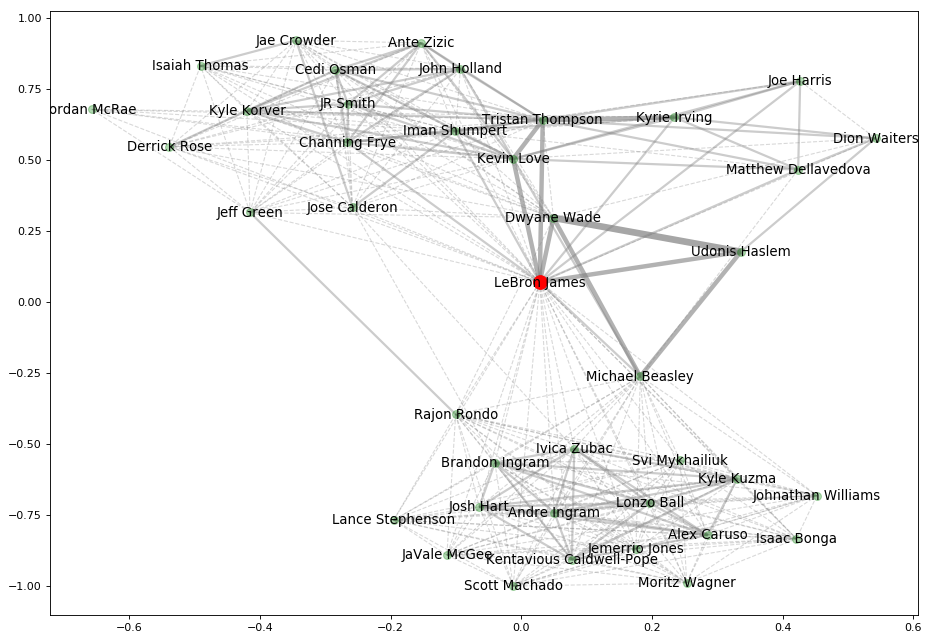

In [27]:
one_season = [(u, v) for (u, v, d) in LeBron_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in LeBron_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in LeBron_network.edges(data=True) if d['weight']>3 and d['weight']<7]
seven_plus_seasons = [(u, v) for (u, v, d) in LeBron_network.edges(data=True) if d['weight']>6]

figure(num=None, figsize=(14, 10), dpi=80)
pos = net.spring_layout(LeBron_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(LeBron_network, pos, node_size=50, node_color='g', alpha=0.3)
net.draw_networkx_nodes(LeBron_network, pos, nodelist=["LeBron James"], node_size=150, node_color='r')

# edges
net.draw_networkx_edges(LeBron_network, pos, edgelist=seven_plus_seasons,
                       width=6, edge_color='grey', alpha=0.7)
net.draw_networkx_edges(LeBron_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='grey', alpha=0.6)
net.draw_networkx_edges(LeBron_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='grey', alpha=0.4)
net.draw_networkx_edges(LeBron_network, pos, edgelist=one_season,
                       width=1, alpha=0.3, edge_color='grey', style='dashed')

# labels
net.draw_networkx_labels(LeBron_network, pos, font_size=12, font_weight = 'normal', font_family='sans-serif')

### In LeBron's network above is every active player he has teamed with. Thicker lines represent teammates he has spend more seasons with.

# Stephen Curry's network below:

In [29]:
Steph_network = net.ego_graph(playernet, "Stephen Curry")
print "nodes in Stephen Curry's networkd (total teammates):", len(Steph_network)
Steph_cluster = net.Graph(net.ego_graph(playernet, "Stephen Curry", radius = 1))
print "percent of Steph's teammates that have played together:", net.average_clustering(Steph_cluster)

nodes in Stephen Curry's networkd (total teammates): 31
percent of Steph's teammates that have played together: 0.806399484785


{'Alfonzo McKinnie': Text(-0.00561974,0.659024,u'Alfonzo McKinnie'),
 'Andre Iguodala': Text(0.155032,-0.10049,u'Andre Iguodala'),
 'Andrew Bogut': Text(-0.198714,-0.161319,u'Andrew Bogut'),
 'Chris Boucher': Text(0.770393,-0.0740091,u'Chris Boucher'),
 'Damian Jones': Text(0.181666,0.205122,u'Damian Jones'),
 'Damion Lee': Text(-0.417389,0.0262135,u'Damion Lee'),
 'DeMarcus Cousins': Text(0.347116,0.457587,u'DeMarcus Cousins'),
 'Dewayne Dedmon': Text(-0.133143,-0.877389,u'Dewayne Dedmon'),
 'Draymond Green': Text(0.0642662,-0.153194,u'Draymond Green'),
 'Ekpe Udoh': Text(-0.892444,0.0121026,u'Ekpe Udoh'),
 'Harrison Barnes': Text(-0.0184198,-0.460022,u'Harrison Barnes'),
 'Ian Clark': Text(0.577801,0.237521,u'Ian Clark'),
 'Ish Smith': Text(-0.769634,0.703431,u'Ish Smith'),
 'JaVale McGee': Text(0.517302,0.0299039,u'JaVale McGee'),
 'Jacob Evans': Text(-0.334056,0.477283,u'Jacob Evans'),
 'Jeremy Lin': Text(-0.469381,-1,u'Jeremy Lin'),
 'Jonas Jerebko': Text(-0.223058,0.575231,u'Jona

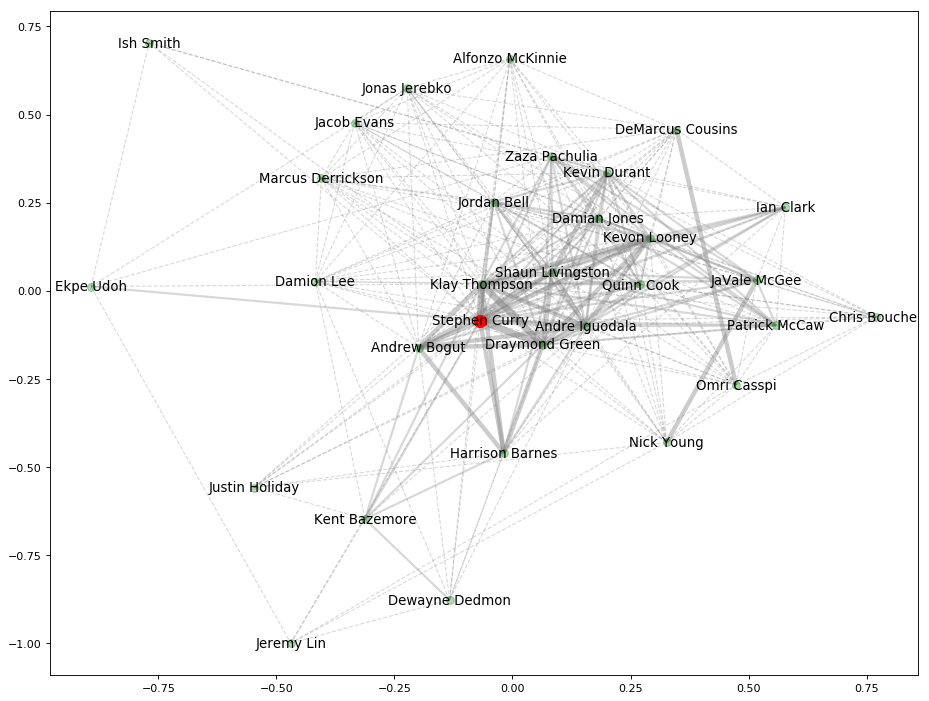

In [34]:
one_season = [(u, v) for (u, v, d) in Steph_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in Steph_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in Steph_network.edges(data=True) if d['weight']>3 and d['weight']<7]
seven_plus_seasons = [(u, v) for (u, v, d) in Steph_network.edges(data=True) if d['weight']>6]

figure(num=None, figsize=(14, 11), dpi=80)
pos = net.spring_layout(Steph_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(Steph_network, pos, node_size=50, node_color='g', alpha=0.3)
net.draw_networkx_nodes(Steph_network, pos, nodelist=["Stephen Curry"], node_size=120, node_color='r')

# edges
net.draw_networkx_edges(Steph_network, pos, edgelist=seven_plus_seasons,
                       width=6, edge_color='grey', alpha=0.5)
net.draw_networkx_edges(Steph_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='grey', alpha=0.4)
net.draw_networkx_edges(Steph_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='grey', alpha=0.3)
net.draw_networkx_edges(Steph_network, pos, edgelist=one_season,
                       width=1, alpha=0.3, edge_color='grey', style='dashed')

# labels
net.draw_networkx_labels(Steph_network, pos, font_size=12, font_weight = 'normal', font_family='sans-serif')

### Stephen Cury has only played for 1 team, while LeBron has played for 3 teams. Hence, Stephen Curry's network has 1 tight group of players above, while LeBron's network has 2 or 3 tight groups of players. 

# Kawhi Leonard's network below:

In [220]:
Kawhi_network = net.ego_graph(playernet, "Kawhi Leonard")
print "nodes in Kawhi Leonard's network (total teammates):", len(Kawhi_network)
Kawhi_cluster = net.Graph(net.ego_graph(playernet, "Kawhi Leonard", radius = 1))
print "percent of Kawhi's teammates that have played together:", net.average_clustering(Kawhi_cluster)

nodes in Kawhi Leonard's network (total teammates): 34
percent of Kawhi's teammates that have played together: 0.865691368669


In [35]:
Kawhi_network = net.ego_graph(playernet, "Kawhi Leonard")
print "nodes in Kawhi Leonard's network (total teammates):", len(Kawhi_network)
Kawhi_cluster = net.Graph(net.ego_graph(playernet, "Kawhi Leonard", radius = 1))
print "percent of Kawhi's teammates that have played together:", net.average_clustering(Kawhi_cluster)

nodes in Kawhi Leonard's network (total teammates): 34
percent of Kawhi's teammates that have played together: 0.865691368669


{'Aron Baynes': Text(0.446736,0.287411,u'Aron Baynes'),
 'Boban Marjanovic': Text(1,0.141709,u'Boban Marjanovic'),
 'Bryn Forbes': Text(0.597424,-0.454494,u'Bryn Forbes'),
 'CJ Miles': Text(-0.440274,0.482112,u'CJ Miles'),
 'Chris Boucher': Text(-0.74341,-0.139183,u'Chris Boucher'),
 'Cory Joseph': Text(0.148721,0.263001,u'Cory Joseph'),
 'Danny Green': Text(0.120606,-0.0617036,u'Danny Green'),
 'Davis Bertans': Text(0.448066,-0.494935,u'Davis Bertans'),
 'Delon Wright': Text(-0.446692,0.173307,u'Delon Wright'),
 'Derrick White': Text(0.526886,-0.665058,u'Derrick White'),
 'Dewayne Dedmon': Text(0.900216,-0.456898,u'Dewayne Dedmon'),
 'Fred VanVleet': Text(-0.531793,0.297799,u'Fred VanVleet'),
 'Greg Monroe': Text(-0.86956,0.2485,u'Greg Monroe'),
 'JaMychal Green': Text(0.761925,0.433406,u'JaMychal Green'),
 'Jodie Meeks': Text(-0.376913,-0.0878181,u'Jodie Meeks'),
 'Jonas Valanciunas': Text(-0.317198,0.222454,u'Jonas Valanciunas'),
 'Jonathon Simmons': Text(0.823557,-0.198428,u'Jonath

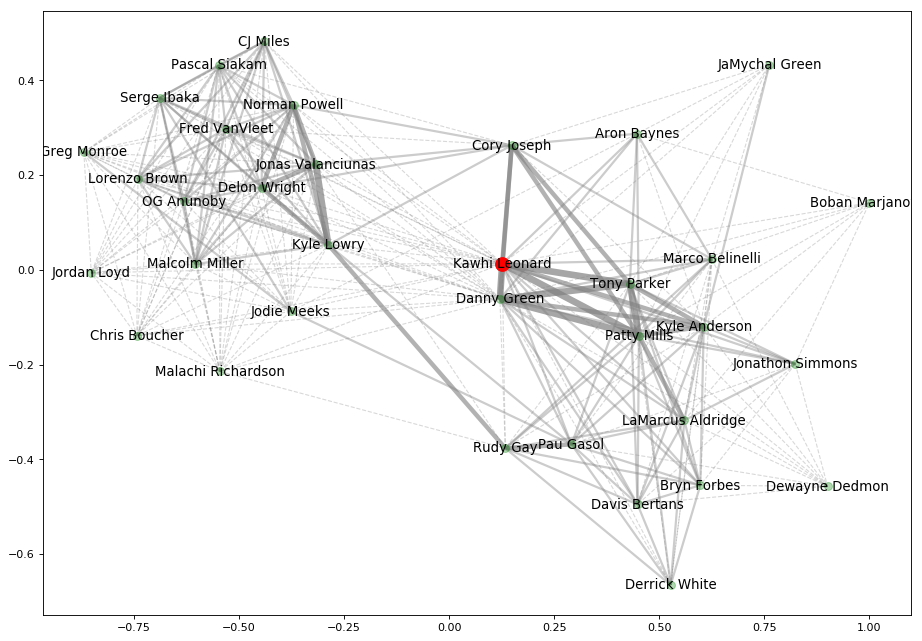

In [36]:
one_season = [(u, v) for (u, v, d) in Kawhi_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in Kawhi_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in Kawhi_network.edges(data=True) if d['weight']>3 and d['weight']<7]
seven_plus_seasons = [(u, v) for (u, v, d) in Kawhi_network.edges(data=True) if d['weight']>6]

figure(num=None, figsize=(14, 10), dpi=80)
pos = net.spring_layout(Kawhi_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(Kawhi_network, pos, node_size=50, node_color='g', alpha=0.3)
net.draw_networkx_nodes(Kawhi_network, pos, nodelist=["Kawhi Leonard"], node_size=150, node_color='r')

# edges
net.draw_networkx_edges(Kawhi_network, pos, edgelist=seven_plus_seasons,
                       width=6, edge_color='grey', alpha=0.7)
net.draw_networkx_edges(Kawhi_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='grey', alpha=0.6)
net.draw_networkx_edges(Kawhi_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='grey', alpha=0.4)
net.draw_networkx_edges(Kawhi_network, pos, edgelist=one_season,
                       width=1, alpha=0.3, edge_color='grey', style='dashed')

# labels
net.draw_networkx_labels(Kawhi_network, pos, font_size=12, font_weight = 'normal', font_family='sans-serif')

### Danny Green was part of the trade that sent Kawhi from the Spurs to the Raptors. Thus, Danny Green's node is near Kawhi above, in the middle of two clusters.

# Kevin Durant's Network

In [37]:
Durant_network = net.ego_graph(playernet, "Kevin Durant")
print "nodes in Durant's network (total teammates):", len(Durant_network)

nodes in Durant's network (total teammates): 38


{'Alfonzo McKinnie': Text(-0.378427,-0.352244,u'Alfonzo McKinnie'),
 'Andre Iguodala': Text(0.137719,-0.395195,u'Andre Iguodala'),
 'Andrew Bogut': Text(-0.0878681,-0.52288,u'Andrew Bogut'),
 'Cameron Payne': Text(-0.158602,1,u'Cameron Payne'),
 'Chris Boucher': Text(0.477802,-0.212781,u'Chris Boucher'),
 'D.J. Augustin': Text(-0.397624,0.603813,u'D.J. Augustin'),
 'Damian Jones': Text(0.114847,-0.476951,u'Damian Jones'),
 'Damion Lee': Text(-0.388042,-0.570143,u'Damion Lee'),
 'DeMarcus Cousins': Text(-0.277504,-0.453263,u'DeMarcus Cousins'),
 'Dion Waiters': Text(-0.36756,0.815296,u'Dion Waiters'),
 'Draymond Green': Text(0.0301811,-0.398455,u'Draymond Green'),
 'Enes Kanter': Text(0.110089,0.82921,u'Enes Kanter'),
 'Ian Clark': Text(0.212121,0.0074865,u'Ian Clark'),
 'Ish Smith': Text(0.434622,0.394405,u'Ish Smith'),
 'JaVale McGee': Text(0.360149,-0.412702,u'JaVale McGee'),
 'Jacob Evans': Text(-0.129582,-0.737447,u'Jacob Evans'),
 'James Harden': Text(-0.315387,0.326792,u'James Ha

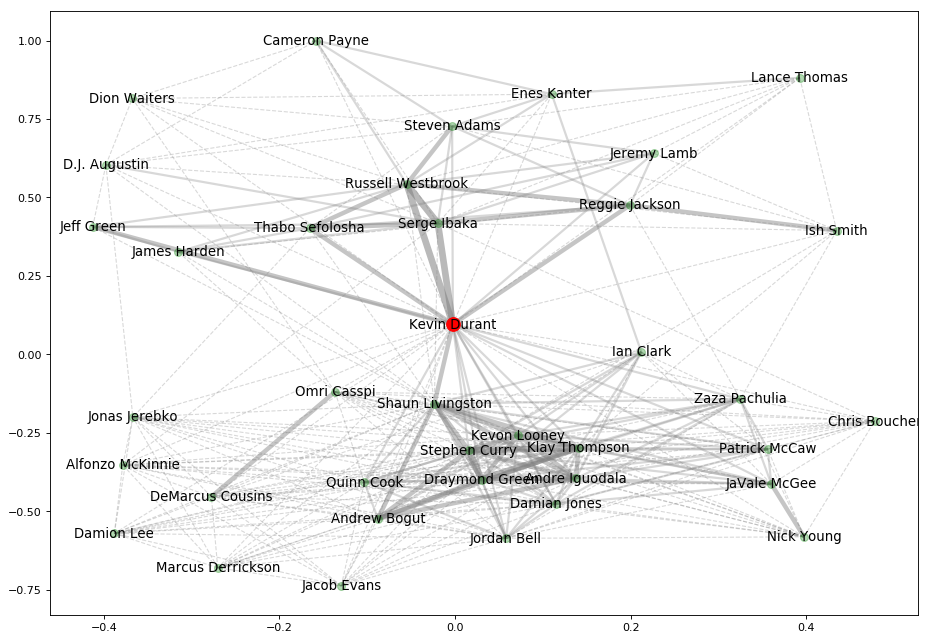

In [42]:
one_season = [(u, v) for (u, v, d) in Durant_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in Durant_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in Durant_network.edges(data=True) if d['weight']>3 and d['weight']<7]
seven_plus_seasons = [(u, v) for (u, v, d) in Durant_network.edges(data=True) if d['weight']>6]

figure(num=None, figsize=(14, 10), dpi=80)
pos = net.spring_layout(Durant_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(Durant_network, pos, node_size=50, node_color='g', alpha=0.3)
net.draw_networkx_nodes(Durant_network, pos, nodelist=["Kevin Durant"], node_size=150, node_color='r')

# edges
net.draw_networkx_edges(Durant_network, pos, edgelist=seven_plus_seasons,
                       width=6, edge_color='grey', alpha=0.55)
net.draw_networkx_edges(Durant_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='grey', alpha=0.45)
net.draw_networkx_edges(Durant_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='grey', alpha=0.3)
net.draw_networkx_edges(Durant_network, pos, edgelist=one_season,
                       width=1, alpha=0.3, edge_color='grey', style='dashed')

# labels
net.draw_networkx_labels(Durant_network, pos, font_size=12, font_weight = 'normal', font_family='sans-serif')

# Network of NBA All-Stars:

In [45]:
All_Star_players = ['James Harden',
             'Kevin Durant',
             'Kyrie Irving',
             'Kawhi Leonard',
             'LeBron James',
             'Anthony Davis',
             'Ben Simmons',
             'Bradley Beal',
             'Damian Lillard',
             'Dwyane Wade',
             'Karl-Anthony Towns',
             'Klay Thompson',
             'LaMarcus Aldridge',
             'Giannis Antetokounmpo',
             'Stephen Curry',
             'Joel Embiid',
             'Paul George',
             'Kemba Walker',
             'Blake Griffin',
             "D'Angelo Russell",
             'Dirk Nowitzki',
             'Khris Middleton',
             'Kyle Lowry',
             'Nikola Jokic',
             'Nikola Vucevic',
             'Victor Oladipo',
             'Russell Westbrook']

In [46]:
for i in All_Star_players:
    print i, "total teammates in the league:", len([n for n in playernet.neighbors(i)])

James Harden total teammates in the league: 47
Kevin Durant total teammates in the league: 37
Kyrie Irving total teammates in the league: 30
Kawhi Leonard total teammates in the league: 33
LeBron James total teammates in the league: 39
Anthony Davis total teammates in the league: 36
Ben Simmons total teammates in the league: 23
Bradley Beal total teammates in the league: 28
Damian Lillard total teammates in the league: 26
Dwyane Wade total teammates in the league: 47
Karl-Anthony Towns total teammates in the league: 22
Klay Thompson total teammates in the league: 29
LaMarcus Aldridge total teammates in the league: 35
Giannis Antetokounmpo total teammates in the league: 29
Stephen Curry total teammates in the league: 30
Joel Embiid total teammates in the league: 27
Paul George total teammates in the league: 30
Kemba Walker total teammates in the league: 26
Blake Griffin total teammates in the league: 41
D'Angelo Russell total teammates in the league: 31
Dirk Nowitzki total teammates in 

{'Anthony Davis': Text(-0.939693,-0.34202,u'Anthony Davis'),
 'Ben Simmons': Text(-0.5,0.866025,u'Ben Simmons'),
 'Blake Griffin': Text(0.173648,-0.984808,u'Blake Griffin'),
 'Bradley Beal': Text(0.766044,0.642788,u'Bradley Beal'),
 "D'Angelo Russell": Text(0.973045,0.230616,u"D'Angelo Russell"),
 'Damian Lillard': Text(-0.686242,-0.727374,u'Damian Lillard'),
 'Dirk Nowitzki': Text(0.766044,-0.642788,u'Dirk Nowitzki'),
 'Dwyane Wade': Text(1,9.65816e-09,u'Dwyane Wade'),
 'Giannis Antetokounmpo': Text(0.893633,-0.448799,u'Giannis Antetokounmpo'),
 'James Harden': Text(-0.0581448,0.998308,u'James Harden'),
 'Joel Embiid': Text(0.597159,0.802123,u'Joel Embiid'),
 'Karl-Anthony Towns': Text(-0.5,-0.866025,u'Karl-Anthony Towns'),
 'Kawhi Leonard': Text(0.973045,-0.230616,u'Kawhi Leonard'),
 'Kemba Walker': Text(-0.939693,0.34202,u'Kemba Walker'),
 'Kevin Durant': Text(-0.835488,0.549509,u'Kevin Durant'),
 'Khris Middleton': Text(-0.686242,0.727374,u'Khris Middleton'),
 'Klay Thompson': Text

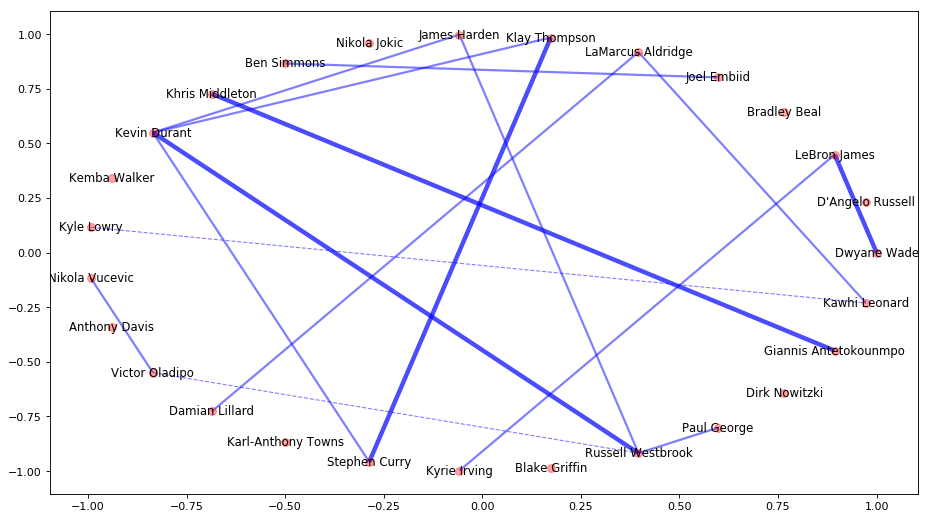

In [51]:
AllStar_network = playernet.subgraph(All_Star_players)

one_season = [(u, v) for (u, v, d) in AllStar_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in AllStar_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in AllStar_network.edges(data=True) if d['weight']>3]

figure(num=None, figsize=(14, 8), dpi=80)
pos = net.circular_layout(AllStar_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(AllStar_network, pos, node_size=50, node_color='r', alpha=0.35)
#net.draw_networkx_nodes(Kawhi_network, pos, nodelist=["Kawhi Leonard"], node_size=200, node_color='r')

# edges
net.draw_networkx_edges(AllStar_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='b', alpha=0.7)
net.draw_networkx_edges(AllStar_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='b', alpha=0.5)
net.draw_networkx_edges(AllStar_network, pos, edgelist=one_season,
                       width=1, alpha=0.5, edge_color='b', style='dashed')

# labels
net.draw_networkx_labels(AllStar_network, pos, font_size=10.5, font_weight = 'normal', font_family='sans-serif')

### Kevin Durant and Russell Westbrook have played with four current All-Stars at some point in their careers. But, the list below shows 8 current All-Stars have never played with another current All-Star.

In [48]:
AS_list = []

for i in All_Star_players:
    AS_list.append([i, len([n for n in AllStar_network.neighbors(i)])])
    
AS_df = pd.DataFrame(AS_list, columns = ['Player', 'All-Star Teammates'])

AS_df = AS_df.sort_values(by=['All-Star Teammates'], ascending=False)
AS_df


#for i in All_Star_players:
#    print i, "total All-Star teammates:", len([n for n in AllStar_network.neighbors(i)])

,Player,All-Star Teammates
26,Russell Westbrook,4
1,Kevin Durant,4
11,Klay Thompson,2
25,Victor Oladipo,2
14,Stephen Curry,2
12,LaMarcus Aldridge,2
0,James Harden,2
4,LeBron James,2
3,Kawhi Leonard,2
13,Giannis Antetokounmpo,1


In [240]:
team_list = []

for i in teams:
    team_list.append([i, len([n for n in AllStar_network.neighbors(i)])])
    
AS_df = pd.DataFrame(AS_list, columns = ['Player', 'All-Star Teammates'])

AS_df = AS_df.sort_values(by=['All-Star Teammates'], ascending=False)
AS_df

,0,1,2,3
0,Blazers2018,Damian Lillard,2018,Blazers
1,Blazers2018,CJ McCollum,2018,Blazers
2,Blazers2018,Jusuf Nurkic,2018,Blazers
3,Blazers2018,Al-Farouq Aminu,2018,Blazers
4,Blazers2018,Seth Curry,2018,Blazers


# Players that have played for most teams:

In [259]:
nba_players = pd.DataFrame(nba_data_df.groupby("Player").Team.nunique())
nba_players = nba_players.sort_values(by=["Team"], ascending=False)
nba_players.head(20)

,Team
Player,
Gerald Green,8
Jerryd Bayless,8
Shaun Livingston,8
Anthony Tolliver,8
Jamal Crawford,7
Trevor Ariza,7
Jodie Meeks,7
Vince Carter,7
Jeremy Lin,7


# Teams that have had the most active players:

In [262]:
nba_teams = pd.DataFrame(nba_data_df.groupby("Team").Player.nunique())
nba_teams = nba_teams.sort_values(by=["Player"], ascending=False)
nba_teams.head(10)

,Player
Team,
Suns,50
Grizzlies,47
Hawks,47
Rockets,46
Sixers,45
Bulls,43
Knicks,41
Magic,41
Hornets,40


### Nearly 10% of the current players have played on the Suns during their career.